## Rodrigo Xavier
## Matrícula 569037

## Kronecker product

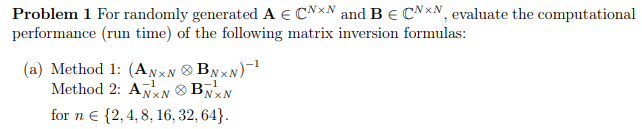

In [1]:
import numpy as np
import time

# METHOD 1
# Function to compute runtime for Kronecker product and inverse
matrix_sizes = [2, 4, 8, 16, 32, 64] # Matrix dimensions
runtimes_method1 = []  # To store the runtimes

for size in matrix_sizes:
    # Generate two random matrices of size `size x size`
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    start_time = time.time()  # Start timer

    # Compute Kronecker product
    kron_product = np.kron(A, B)

    # Compute inverse of the Kronecker product
    try:
        inverse_kron = np.linalg.inv(kron_product)
    except np.linalg.LinAlgError:
        print(f"Matrix of size {size}x{size} is singular, cannot compute inverse.")
        runtimes.append(None)
        continue

    end_time = time.time()  # End timer

    # Compute and store runtime
    runtime = end_time - start_time
    runtimes_method1.append(runtime)

# METHOD 2
# Function to compute runtime for inverses first, then Kronecker product
runtimes_method2 = []  # To store the runtimes

for size in matrix_sizes:
    # Generate two random matrices of size `size x size`
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    start_time = time.time()  # Start timer

    # Compute inverses of A and B
    try:
        A_inv = np.linalg.inv(A)
        B_inv = np.linalg.inv(B)
    except np.linalg.LinAlgError:
        print(f"Matrix of size {size}x{size} is singular, cannot compute inverse.")
        runtimes.append(None)
        continue

    # Compute Kronecker product of inverses
    kron_product = np.kron(A_inv, B_inv)

    # Compute and store runtime
    end_time = time.time()  # End timer
    runtime = end_time - start_time
    runtimes_method2.append(runtime)

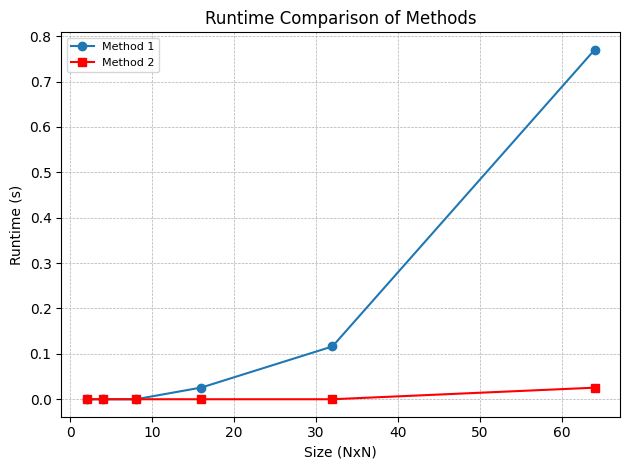

In [2]:
import matplotlib.pyplot as plt

# Plotting the runtimes
plt.plot(matrix_sizes, runtimes_method1, label="Method 1", marker="o")
plt.plot(matrix_sizes, runtimes_method2, label="Method 2", marker="s", color='red')

# Adding labels and legend
plt.xlabel("Size (NxN)", fontsize=10)
plt.ylabel("Runtime (s)", fontsize=10)
plt.title("Runtime Comparison of Methods", fontsize=12)
plt.legend(fontsize=8)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

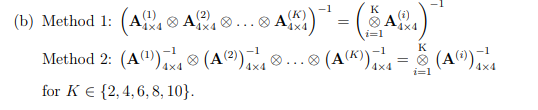

In [11]:
import cupy as cp
from functools import reduce
import time

# Define the K values
K_values = [2, 3, 4, 5, 6]
runtimes_method1 = []
runtimes_method2 = []

for K in K_values:
    # METHOD 1: Kronecker product then inverse
    # Start timer for Method 1
    start_time = time.time()

    # Generate a list of 4x4 matrices on the GPU
    matrices = [cp.random.rand(4, 4) for _ in range(K)]

    # Compute the Kronecker product using reduce
    result = reduce(cp.kron, matrices)

    # Calculate the inverse of the resulting matrix
    result_inverse = cp.linalg.inv(result)

    # Compute and store runtime for Method 1
    end_time = time.time()  # End timer
    runtime_method1 = end_time - start_time
    runtimes_method1.append(runtime_method1)

    # METHOD 2: Inverse of matrices before Kronecker
    # Start timer for Method 2
    start_time = time.time()

    # Compute the inverse of each matrix before the product
    inverse_matrices = [cp.linalg.inv(matrix) for matrix in matrices]

    # Compute the Kronecker product of the inverses
    result_method2 = reduce(cp.kron, inverse_matrices)

    # Compute and store runtime for Method 2
    end_time = time.time()  # End timer
    runtime_method2 = end_time - start_time
    runtimes_method2.append(runtime_method2)

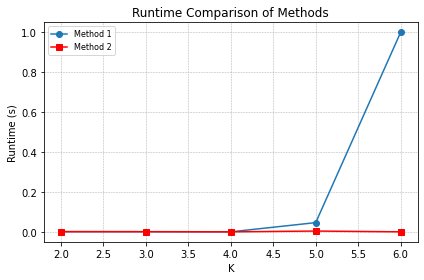

In [12]:
import matplotlib.pyplot as plt

# Plotting the runtimes
plt.plot(K_values, runtimes_method1, label="Method 1", marker="o")
plt.plot(K_values, runtimes_method2, label="Method 2", marker="s", color='red')

# Adding labels and legend
plt.xlabel("K", fontsize=10)
plt.ylabel("Runtime (s)", fontsize=10)
plt.title("Runtime Comparison of Methods", fontsize=12)
plt.legend(fontsize=8)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

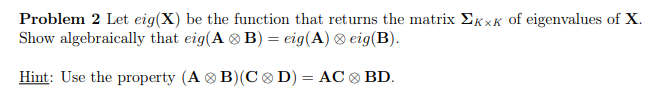

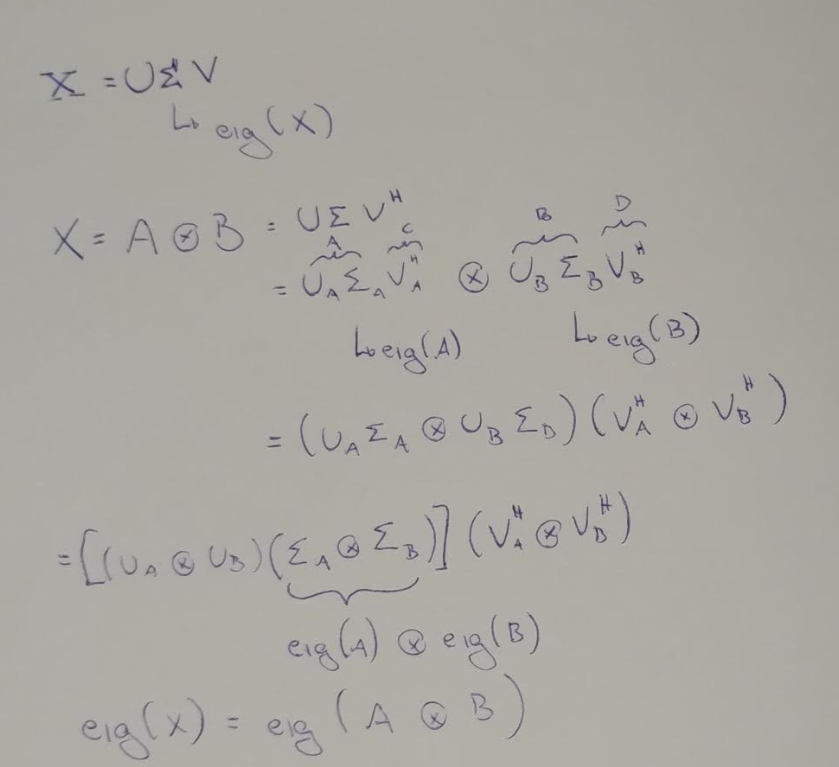